# Forecasting using ARIMA and SARIMAX 

### Steps
-Load the dataset
-Milk Production ( I hope you remember this one)
-Plot the time series
###### -Check if the series is stationary using the Augmented Dickey Fuller test 
###### -Forecast assuming the series is non-seasonal first
-Generate the forecast using p=2 and q=2
-Perform one step, dynamic and out of sample forecast
-Plot all the charts
###### -Use the grid search
-Perform one step, dynamic and out of sample forecast
-Plot all the charts
###### -Then do seasonal forecasting
Use auto_arima to get the parameters
###### -Compare both the forecasts


In [192]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

In [193]:
df_milk = pd.read_csv('milk_production.csv')

In [194]:
df_milk.head()

,date,pounds_per_cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [195]:
df_milk.tail()

,date,pounds_per_cow
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [196]:
# Cleaning up the data
df_milk.columns=["Month","Demand"]
df_milk.head()


,Month,Demand
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [197]:
# Convert Month into Datetime
df_milk['Month']=pd.to_datetime(df_milk['Month'])

In [198]:
df_milk.head()

,Month,Demand
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [199]:
df_milk.set_index('Month',inplace=True)

In [200]:
df_milk

,Demand
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


### Visualizing the Time Series

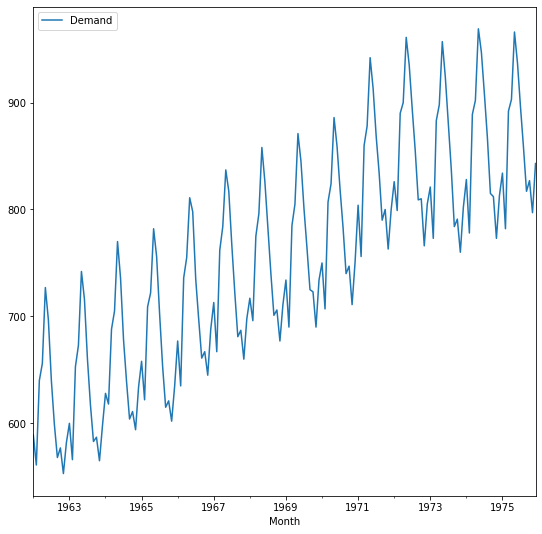

In [201]:
df_milk.plot(figsize = (9,9))

###### Here, as we can see the time series graph and it is following a particular trend. Hence, we can say that the data is seasonal.

### Testing For Stationarity
###### By using Augmented Dickey Fuller test

In [202]:
from statsmodels.tsa.stattools import adfuller

In [203]:
def adfuller_test(Demand):
    result=adfuller(Demand)
    labels = ['ADF','p-value','Number of Lags','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is non-stationary")

In [204]:
adfuller_test(df_milk['Demand'])

ADF : -1.3038115874221303
p-value : 0.6274267086030312
Number of Lags : 13
Number of Observations Used : 154
The data is non-stationary


###### Here, by using Augmented Dickey Fuller test  we found out that the data is not stationary. Also we got the no. of lags(13) used, the value of p(0.6), no. of observation used(154) and ADF test statistic(-1.303). As the obtained value of p is very less as compare to statistical significant value the data is non stationary.

## Decomposition

###### By using Grid Search

<ipython-input-205-9fba0bdc91b7>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = seasonal_decompose(df_milk['Demand'],  freq=12)


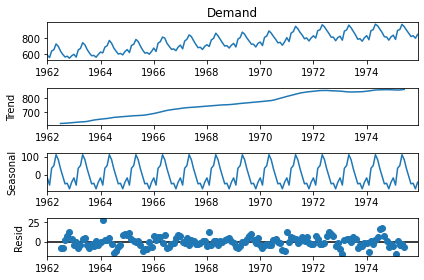

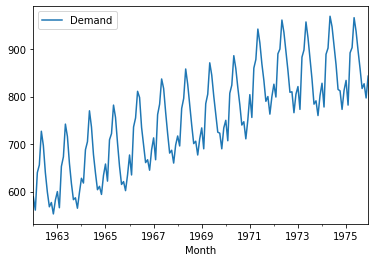

In [205]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing decomposition
decomp = seasonal_decompose(df_milk['Demand'],  freq=12) 
decomp.plot()
df_milk.plot()

###### Here, by using statsmodels.tsa.seasonal library we first imported seasonal_decompose and decomposed the data on the basis of seasons( freq = 12). And  to choose these values statistically we used grid search.

### Making Data Stationary 

In [206]:
#Again using dickey fuller test

df_milk_diff = df_milk.diff().dropna()
result = adfuller_test(df_milk_diff['Demand'])
result

ADF : -3.054995558653041
p-value : 0.030068004001788037
Number of Lags : 14
Number of Observations Used : 152
The data is stationary


##### To convert data to stationory data we again performed dickey fuller test and dropped NA values after sesional_decomposition of data . BAsically, we are rejecting the null hypothesis and accepting the alternate hypothesis.

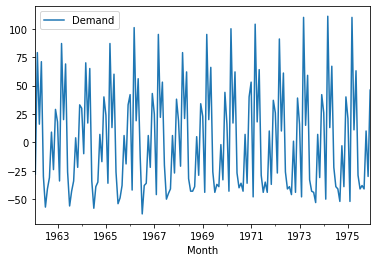

In [207]:
df_milk_diff.plot()

## *Checking Autocorrelation(acf) and Partial Autocorrelation(pacf)

C:\Users\abhin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


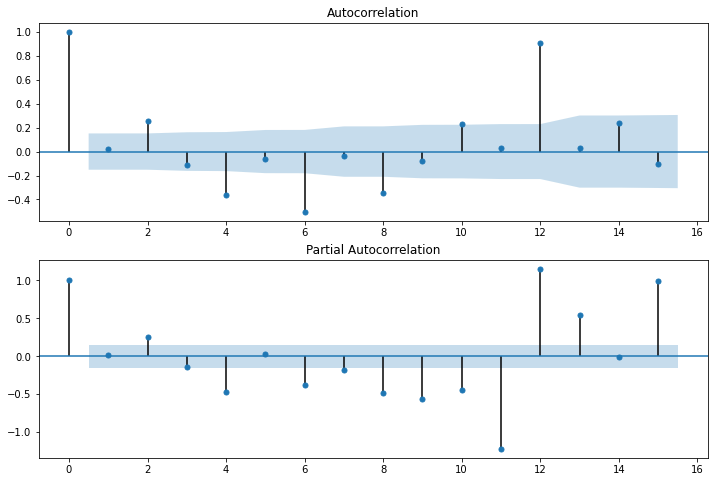

In [208]:
#Importing  Autocorrelation and Partial Autocorrelation functions

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#creating the figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

#plotting autocorrelation
plot_acf(df_milk_diff ,lags=15,ax=ax1)

#plotting partial autocorrelation
plot_pacf(df_milk_diff,lags=15,ax=ax2)

plt.show()

###### Here, we performed acf and pacf function to get the values p q and d. As we observe shut off at 1 which gives us AR (p ) = 1 and d= 1 because we did seasonal decomp only once.

### ***Forecast assuming the series is non-seasonal first


In [229]:
#importing ARIMAX model
from statsmodels.tsa.arima_model import ARIMA
#implemented ARIMAX with (p, q, d) (1, 1, 1)
model = ARIMA(df_milk_diff['Demand'],order=(1, 1, 1))
model_fit=model.fit()
model_fit.summary()

C:\Users\abhin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\abhin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Demand   No. Observations:                  166
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -883.312
Method:                       css-mle   S.D. of innovations             49.435
Date:                Tue, 23 Feb 2021   AIC                           1774.623
Time:                        18:21:19   BIC                           1787.071
Sample:                    03-01-1962   HQIC                          1779.676
                         - 12-01-1975                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0134      2.107     -0.006      0.995      -4.144       4.117
ar.L1.D.Demand    -0.5245      0.112     -4.690      0.000      -0.744      -0.305
ma.L1.D.Demand    -0.1655      0.134     -1.237      0.216      -0.428       0.097
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9067           +0.0000j            1.9067            0.5000
MA.1            6.0405           +0.0000j            6.0405            0.0000
-----------------------------------------------------------------------------
"""

###### Here, after performing non seasonal we got the values of AIC	1774.623, BIC= 1787.017, HQIC= 1779.676

### *Forcasting by using ARIMA model:

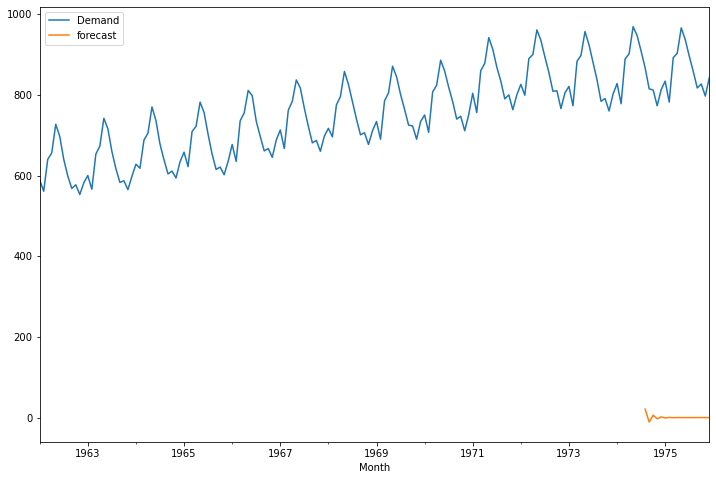

In [288]:

df_milk['forecast']=model_fit.predict(start=150,end=250,dynamic=True)
df_milk[['Demand','forecast']].plot(figsize=(12,8))

### *Forecasting using SARIMA Model

In [291]:
#importing the SARIMA model
import statsmodels.api as sm

#Implementing Sm model to the data
model=sm.tsa.statespace.SARIMAX(df_milk['Demand'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()
#TO get the summary of Sarima model
results.summary()

C:\Users\abhin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\abhin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\abhin\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Demand   No. Observations:                  168
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -527.446
Date:                            Tue, 23 Feb 2021   AIC                           1072.892
Time:                                    19:00:06   BIC                           1100.283
Sample:                                01-01-1962   HQIC                          1084.017
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3089      0.172      1.798      0.072      -0.028       0.646
ar.L2         -0.6739      0.158     -4.272      0.000      -0.983      -0.365
ma.L1         -0.4934      0.149     -3.318      0.001      -0.785      -0.202
ma.L2          0.8100      0.133      6.079      0.000       0.549       1.071
ar.S.L12      -0.9181      0.408     -2.249      0.024      -1.718      -0.118
ar.S.L24       0.0206      0.193      0.107      0.915      -0.358       0.399
ma.S.L12       0.2721      0.417      0.652      0.514      -0.546       1.090
ma.S.L24      -0.5527      0.183     -3.013      0.003      -0.912      -0.193
sigma2        50.8284      4.438     11.454      0.000      42.131      59.526
===================================================================================
Ljung-Box (Q):                       19.76   Jarque-Bera (JB):                62.38
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.86
Prob(H) (two-sided):                  0.28   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

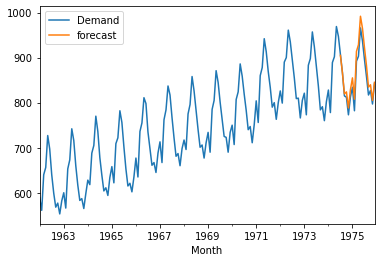

In [292]:
#Forecasting the data after applying SARIMA model
df_milk['forecast']=results.predict(start=150,end=250,dynamic=True)
df_milk[['Demand','forecast']].plot()

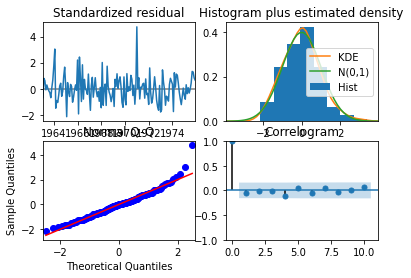

In [299]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()
#Very less noise observed in the graph.

In [293]:
#Creating additional data for 24 months
from pandas.tseries.offsets import DateOffset
future_dates=[df_milk.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [294]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_milk_diff.columns)

In [295]:
future_datest_df.tail()

,Demand,forecast
1977-07-01,NaN,NaN
1977-08-01,NaN,NaN
1977-09-01,NaN,NaN
1977-10-01,NaN,NaN
1977-11-01,NaN,NaN


In [296]:
#Combining the actual data to the forecasted data in to new dataframe ie future_pd
future_df=pd.concat([df_milk,future_datest_df])

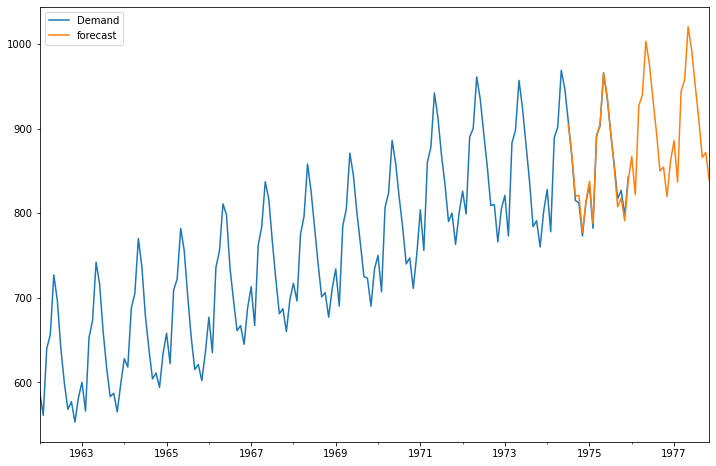

In [297]:
#ploting the new data obtained after concating
future_df['forecast'] = results.predict(start=150,end=250)  
future_df[['Demand', 'forecast']].plot(figsize=(12, 8))


### ***Compare both the forecasts


##### As, we can see that as the data we have is seasional data hemce, after using ARIMA model for the forcasting we do not get accurate forecasting.
##### However, after with the help of Sarima Model we got good forecast for 24 months as the data is seasonal therefore Seasonal model provided much more accuracy for the Forecast
